In [255]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## Reading CSV

In [256]:
df = pd.read_csv(r"D:\Downloads\archive (3) (1)\sp500_stocks.csv")

## Preprocessing

As there are 502 comapanies in this data so only picking one the comapny MMM

In [257]:
df = df[df['Symbol'] == 'MMM']

Check for null values

In [258]:
df.isnull().sum()
df=df.drop(columns=["Symbol"])

Applying dicky fuller test to test stationary

In [259]:
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test on the 'Adj Close' column
adf_result = adfuller(df['Adj Close'])

# Extract and print out the test statistic and p-value
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Check if the p-value is less than a significance level (e.g., 0.05)
if adf_result[1] < 0.05:
    print('The series is likely stationary.')
else:
    print('The series is likely non-stationary.')

ADF Statistic: -1.727298333514047
p-value: 0.4171052623250955
The series is likely non-stationary.


Applying difference and log fot stationary

In [260]:
# Calculate the difference between consecutive values
df['Adj Close Diff'] = df['Adj Close'].diff()

# Drop rows with NaN values resulting from differencing
df.dropna(subset=['Adj Close Diff'], inplace=True)

# Apply logarithmic transformation
df['Adj Close Log'] = df['Adj Close'].apply(lambda x: 0 if x == 0 else np.log(x))

In [261]:
df

,Date,Adj Close,Close,High,Low,Open,Volume,Adj Close Diff,Adj Close Log
1,2010-01-05,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0,-0.290779,3.831497
2,2010-01-06,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0,0.654236,3.845579
3,2010-01-07,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0,0.033535,3.846295
4,2010-01-08,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0,0.329910,3.853317
5,2010-01-11,46.959095,70.217392,70.735786,69.740807,70.551842,3500812.0,-0.190109,3.849277
...,...,...,...,...,...,...,...,...,...
3605,2024-05-01,98.440002,98.440002,99.699997,97.279999,98.099998,11062600.0,1.930000,4.589447
3606,2024-05-02,96.809998,96.809998,98.400002,96.650002,97.959999,6317100.0,-1.630005,4.572750
3607,2024-05-03,97.150002,97.150002,98.190002,96.839996,97.580002,4818500.0,0.340004,4.576256
3608,2024-05-06,96.589996,96.589996,97.750000,96.540001,97.089996,4329500.0,-0.560005,4.570475


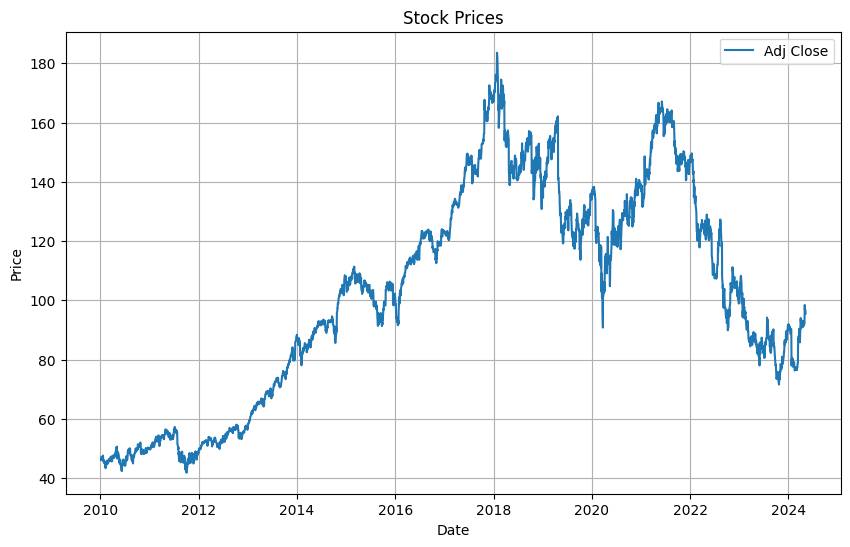

In [262]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close')
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [368]:
import json

# Assuming df is your DataFrame with columns 'Date' and 'Adj Close'

# Convert 'Date' column to string to make it JSON serializable
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# Convert DataFrame to a dictionary
data_dict = df[['Date', 'Adj Close']].to_dict(orient='records')

# Specify the file path for the JSON file
json_file_path = 'data.json'

# Save the data dictionary to a JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(data_dict, json_file)

print("Data saved as JSON successfully.")

Data saved as JSON successfully.


Grouping data on the basis of Years and Months

In [263]:
from sklearn.preprocessing import MinMaxScaler

# Extract year and month from the 'Date' column and create new columns 'Year' and 'Month'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Reshape the 'Adj Close' column for scaling
adj_close_column = df['Adj Close Diff'].values.reshape(-1, 1)

adj_close_column_log = df['Adj Close Log'].values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform min-max scaling
adj_close_normalized = scaler.fit_transform(adj_close_column)

adj_close_normalized_log = scaler.fit_transform(adj_close_column_log)

# Assign the normalized values to the DataFrame
df['Adj Close Normalized_Diff'] = adj_close_normalized

df['Adj Close Normalized_Log'] = adj_close_normalized_log




In [264]:
df

,Date,Adj Close,Close,High,Low,Open,Volume,Adj Close Diff,Adj Close Log,Year,Month,Adj Close Normalized_Diff,Adj Close Normalized_Log
1,2010-01-05,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0,-0.290779,3.831497,2010,1,0.637767,0.066593
2,2010-01-06,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0,0.654236,3.845579,2010,1,0.666948,0.076110
3,2010-01-07,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0,0.033535,3.846295,2010,1,0.647782,0.076594
4,2010-01-08,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0,0.329910,3.853317,2010,1,0.656933,0.081339
5,2010-01-11,46.959095,70.217392,70.735786,69.740807,70.551842,3500812.0,-0.190109,3.849277,2010,1,0.640876,0.078609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,2024-05-01,98.440002,98.440002,99.699997,97.279999,98.099998,11062600.0,1.930000,4.589447,2024,5,0.706342,0.578798
3606,2024-05-02,96.809998,96.809998,98.400002,96.650002,97.959999,6317100.0,-1.630005,4.572750,2024,5,0.596414,0.567515
3607,2024-05-03,97.150002,97.150002,98.190002,96.839996,97.580002,4818500.0,0.340004,4.576256,2024,5,0.657245,0.569884
3608,2024-05-06,96.589996,96.589996,97.750000,96.540001,97.089996,4329500.0,-0.560005,4.570475,2024,5,0.629454,0.565977


In [265]:
yearly_monthly_avg = df.groupby(['Year', 'Month']).mean()
yearly_monthly_avg

Date  Adj Close      Close       High  \
Year Month                                                                  
2010 1     2010-01-17 02:40:00.000000000  46.408625  69.394277  70.026477   
     2     2010-02-13 10:06:18.947368448  44.824470  66.802940  67.274248   
     3     2010-03-15 15:39:07.826086912  46.098352  68.392467  68.796350   
     4     2010-04-16 17:08:34.285714176  48.091365  71.349340  71.802039   
     5     2010-05-15 12:00:00.000000000  47.170385  69.780935  70.843227   
...                                  ...        ...        ...        ...   
2024 1     2024-01-16 09:08:34.285714176  86.860169  86.860169  87.838429   
     2     2024-02-15 04:48:00.000000000  77.616639  77.616639  78.110369   
     3     2024-03-15 02:24:00.000000000  84.071907  84.071907  84.895067   
     4     2024-04-14 22:54:32.727272704  92.267728  92.267728  93.245454   
     5     2024-05-03 19:12:00.000000000  96.906000  96.906000  98.244000   

                  Low       Open        Volume  Adj Close Diff  Adj Close Log  \
Year Month                                                                      
2010 1      68.776012  69.572650  4.794924e+06       -0.078594       3.837360   
     2      66.134042  66.814822  4.722337e+06        0.008544       3.802644   
     3      67.871529  68.277592  4.735437e+06        0.083800       3.830714   
     4      70.783962  71.270903  5.490608e+06        0.136867       3.872853   
     5      68.449833  70.097408  6.552501e+06       -0.246923       3.853199   
...               ...        ...           ...             ...            ...   
2024 1      85.963529  87.148032  5.641037e+06       -0.596034       4.462533   
     2      76.964465  77.602425  4.631181e+06       -0.093227       4.351701   
     3      83.097826  83.770067  8.078986e+06        0.583194       4.429818   
     4      91.181819  92.221363  5.082609e+06        0.355578       4.524602   
     5      96.565999  97.463998  6.087448e+06       -0.194000       4.573695   

            Adj Close Normalized_Diff  Adj Close Normalized_Log  
Year Month                                                       
2010 1                       0.644319                  0.070555  
     2                       0.647010                  0.047095  
     3                       0.649334                  0.066064  
     4                       0.650973                  0.094541  
     5                       0.639122                  0.081259  
...                               ...                       ...  
2024 1                       0.628342                  0.493032  
     2                       0.643868                  0.418135  
     3                       0.664754                  0.470925  
     4                       0.657726                  0.534977  
     5                       0.640756                  0.568153  

[173 rows x 11 columns]

## Arima

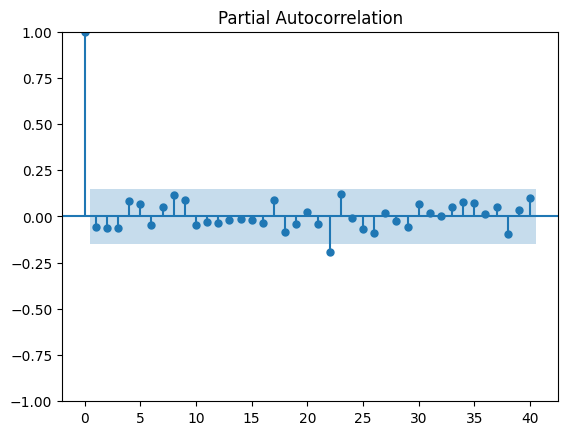

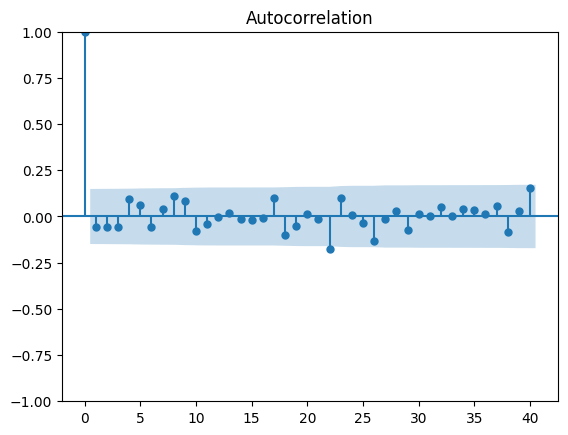

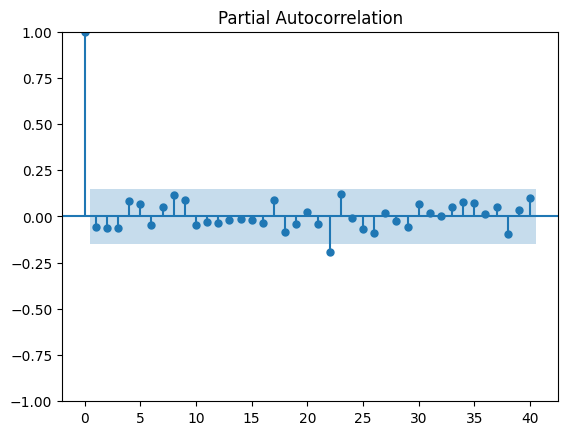

In [266]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced series
plot_acf(yearly_monthly_avg['Adj Close Diff'].dropna(), lags=40)
plot_pacf(yearly_monthly_avg['Adj Close Diff'].dropna(), lags=40)

In [267]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
train_size = int(len(yearly_monthly_avg) * 0.8)
train_data, test_data = yearly_monthly_avg['Adj Close Normalized_Diff'][:train_size], yearly_monthly_avg['Adj Close Normalized_Diff'][train_size:]



# Fit ARIMA model
p = 22
d =  1
q = 22
modelAr = ARIMA(train_data, order=(p, d, q))
modelAr_fit = modelAr.fit()

# Make forecasts
forecast_steps = len(test_data)
forecast = modelAr_fit.forecast(steps=forecast_steps)

# Calculate RMSE
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)



Root Mean Squared Error (RMSE): 0.015483542985268809


Cross Validation for Arima

In [268]:

#  ARIMA MODEL CROSS VALIDATION

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming yearly_monthly_avg['Adj Close Diff'] is your differenced time series
# Fill in the data preparation steps as needed

# Plot ACF and PACF for the differenced series
plot_acf(yearly_monthly_avg['Adj Close Diff'].dropna(), lags=40)
plot_pacf(yearly_monthly_avg['Adj Close Diff'].dropna(), lags=40)
plt.show()

# Define the number of splits for cross-validation
n_splits = 5

# Initialize the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store the RMSE for each fold
rmse_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(yearly_monthly_avg['Adj Close Diff']):
    train_data = yearly_monthly_avg['Adj Close Diff'].iloc[train_index]
    test_data = yearly_monthly_avg['Adj Close Diff'].iloc[test_index]
    
    # Fit the ARIMA model
    model = ARIMA(train_data, order=(1, 0, 0))  # Example order, modify as needed
    model_fit = model.fit()
    
    # Make predictions
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
    
    # Calculate RMSE
    rmse = mean_squared_error(test_data, predictions, squared=False)
    rmse_scores.append(rmse)

# Calculate the mean RMSE across all folds
mean_rmse = sum(rmse_scores) / n_splits

# Print the mean RMSE
print("Mean RMSE:", mean_rmse)




In [269]:
# Create a placeholder for the new month
forecast_next_month = modelAr_fit.forecast(steps=1)

# Print the forecast for the next month
print("Forecast for the next month:", forecast_next_month)

Forecast for the next month: 138    0.647204
dtype: float64


In [270]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(test_data, forecast)
print('Mean Absolute Error (MAE):', mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data.values, forecast)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Error (MAE): 0.012446505647326434
Mean Absolute Percentage Error (MAPE): 1.952756811686911


In [271]:
yearly_monthly_avg['Date'] = pd.to_datetime(yearly_monthly_avg['Date'])

# Set the 'Date' column as the index
yearly_monthly_avg.set_index('Date', inplace=True)

data_2024 = yearly_monthly_avg[yearly_monthly_avg.index.year == 2024]

# Get the index for the next month
next_month_index = data_2024.index[-1] + pd.DateOffset(months=1)

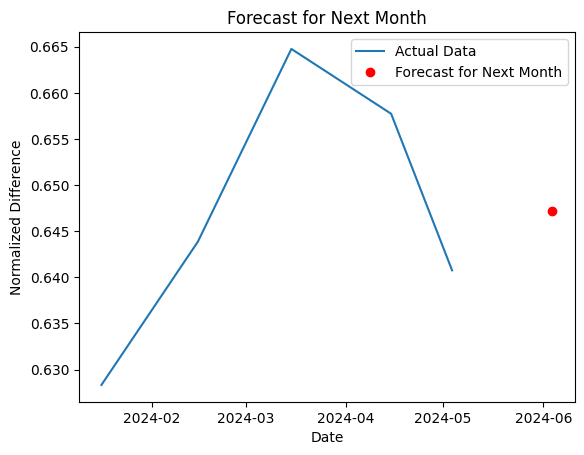

In [272]:
import matplotlib.pyplot as plt



# Plot the actual data
plt.plot(data_2024.index, data_2024['Adj Close Normalized_Diff'], label='Actual Data')

# Plot the forecast for the next month
plt.plot(next_month_index, forecast_next_month, 'ro', label='Forecast for Next Month')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Normalized Difference')
plt.title('Forecast for Next Month')
plt.legend()

# Show plot
plt.show()


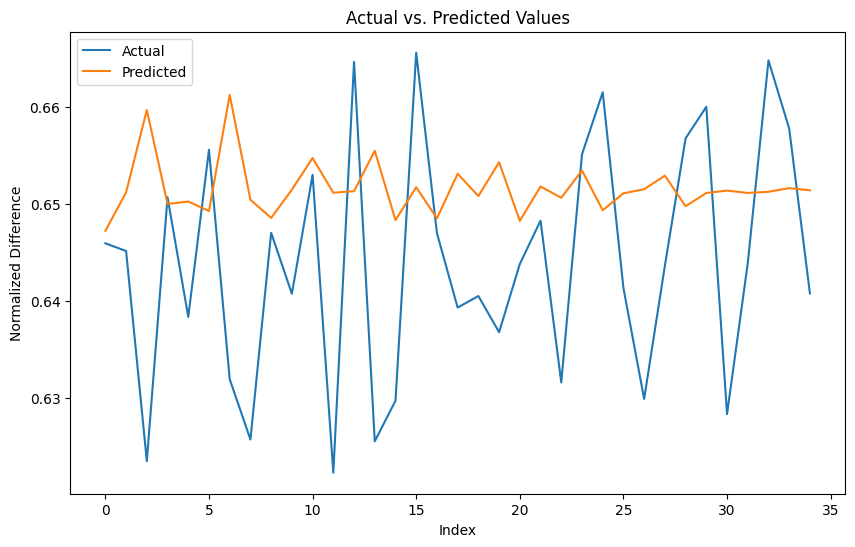

In [273]:
import matplotlib.pyplot as plt
import numpy as np

# Convert test_data and forecast to NumPy arrays
test_data_array = test_data.values
forecast_array = forecast.values

# Adjust the index for plotting
index_rangeAr = range(len(test_data))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(index_rangeAr, test_data_array, label='Actual')
plt.plot(index_rangeAr, forecast_array, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Normalized Difference')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()



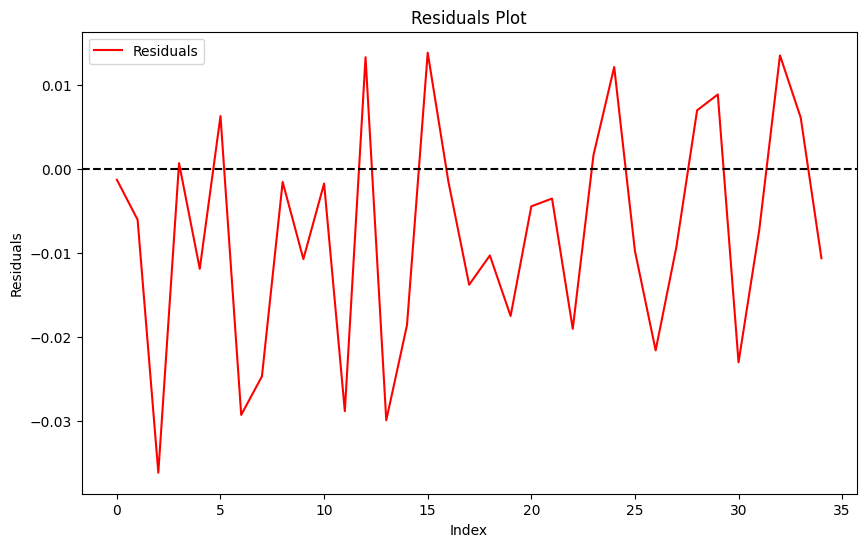

In [274]:
residualsAr = test_data_array - forecast_array

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(index_rangeAr, residualsAr, label='Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

## ANN

In [275]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from sklearn.metrics import mean_squared_error

# Load your data
# Assuming you have loaded your data into a DataFrame named 'yearly_monthly_avg'

# 1. Feature Engineering
features = yearly_monthly_avg.drop(columns=['Adj Close', 'Adj Close Normalized_Diff', "Adj Close Log", "Adj Close Normalized_Log", "Volume", "Adj Close Diff"])

# 2. Train-Test Split
X_trainNN, X_testNN, y_trainNN, y_testNN = train_test_split(features, yearly_monthly_avg['Adj Close Normalized_Diff'], test_size=0.2, shuffle=False)

# 3. Normalization
scaler = MinMaxScaler()
X_train_scaledNN = scaler.fit_transform(X_trainNN)
X_test_scaledNN = scaler.transform(X_testNN)


# 4. Model Design
modelNN = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaledNN.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer for predicting 'Adj Close Normalized_Diff'
])

# 5. Model Compilation
modelNN.compile(optimizer='adam', loss='mean_squared_error')

# 6. Model Training
history = modelNN.fit(X_train_scaledNN, y_trainNN, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# 7. Model Evaluation
loss = modelNN.evaluate(X_test_scaledNN, y_testNN)
print("Test Loss (MSE):", loss)

# 8. Prediction
predictions = modelNN.predict(X_test_scaledNN)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_testNN, predictions))
print("Root Mean Squared Error (RMSE):", rmse)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.6720e-04  
Test Loss (MSE): 0.0001647280587349087
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Root Mean Squared Error (RMSE): 0.012834642346619561


Cross Validation For ANN

In [276]:

#  ANN MODEL CROSS VALIDATION

# already imported above ^^^

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow import keras
# from sklearn.metrics import mean_squared_error

# Load your data
# Assuming you have loaded your data into a DataFrame named 'yearly_monthly_avg'

# 1. Feature Engineering
features = yearly_monthly_avg.drop(columns=['Adj Close', 'Adj Close Normalized_Diff', "Adj Close Log", "Adj Close Normalized_Log", "Volume", "Adj Close Diff"])

# 2. Train-Test Split
X = features.values
y = yearly_monthly_avg['Adj Close Normalized_Diff'].values

# Define the number of splits for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store the RMSE for each fold
rmse_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 3. Normalization
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Model Design
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)  # Output layer for predicting 'Adj Close Normalized_Diff'
    ])

    # 5. Model Compilation
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 6. Model Training
    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    # 7. Model Evaluation
    loss = model.evaluate(X_test_scaled, y_test)
    rmse_scores.append(np.sqrt(loss))

# Calculate the mean RMSE across all folds
mean_rmse = sum(rmse_scores) / n_splits

# Print the mean RMSE
print("Mean Root Mean Squared Error (RMSE) across all folds:", mean_rmse)





In [277]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_testNN, predictions)
print('Mean Absolute Error (MAE):', mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_testNN, predictions)
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)


Mean Absolute Error (MAE): 0.010849362977813536
Mean Squared Error (MSE): 0.00016472804416564008
Root Mean Squared Error (RMSE): 0.012834642346619561


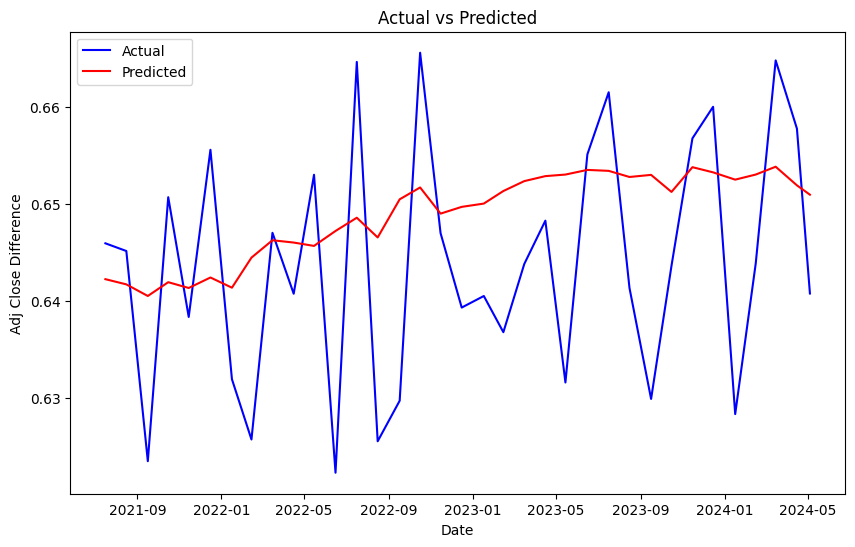

In [278]:
plt.figure(figsize=(10, 6))
plt.plot(y_testNN.index, y_testNN.values, label='Actual', color='blue')
plt.plot(y_testNN.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Difference')
plt.legend()
plt.show()

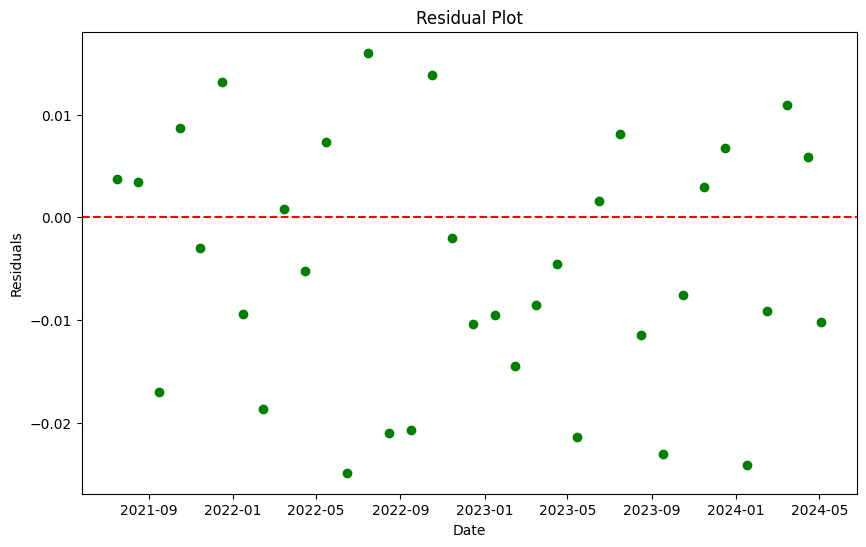

In [279]:
# Calculate residuals
residualsNN = y_testNN - predictions.flatten()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_testNN.index, residualsNN, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

In [280]:
import pandas as pd

# Get the last date in your data
last_date = yearly_monthly_avg.index[-1]

# Generate the next month's date
next_month_date = last_date + pd.DateOffset(months=1)

# Prepare features for the next month
# For example, you can take the last available data point and use it to predict the next month
X_next_month = yearly_monthly_avg.iloc[[-1]].drop(columns=['Adj Close', 'Adj Close Normalized_Diff', "Adj Close Log", "Adj Close Normalized_Log", "Volume", "Adj Close Diff"])

# Scale the features
X_next_month_scaled = scaler.transform(X_next_month)  # Assuming 'scaler' is the MinMaxScaler used earlier

# Make predictions for the next month
forecast_next_month = modelNN.predict(X_next_month_scaled)

# Print the forecast
print("Forecast for", next_month_date, ":", forecast_next_month[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Forecast for 2024-06-03 19:12:00 : 0.65092707


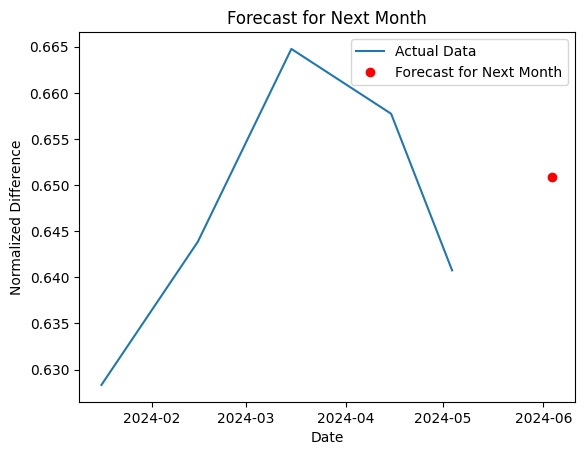

In [281]:
# Plot the actual data
plt.plot(data_2024.index, data_2024['Adj Close Normalized_Diff'], label='Actual Data')

# Plot the forecast for the next month
plt.plot(next_month_date, forecast_next_month, 'ro', label='Forecast for Next Month')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Normalized Difference')
plt.title('Forecast for Next Month')
plt.legend()

# Show plot
plt.show()

## SARIMA

In [282]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose



<Figure size 640x480 with 0 Axes>

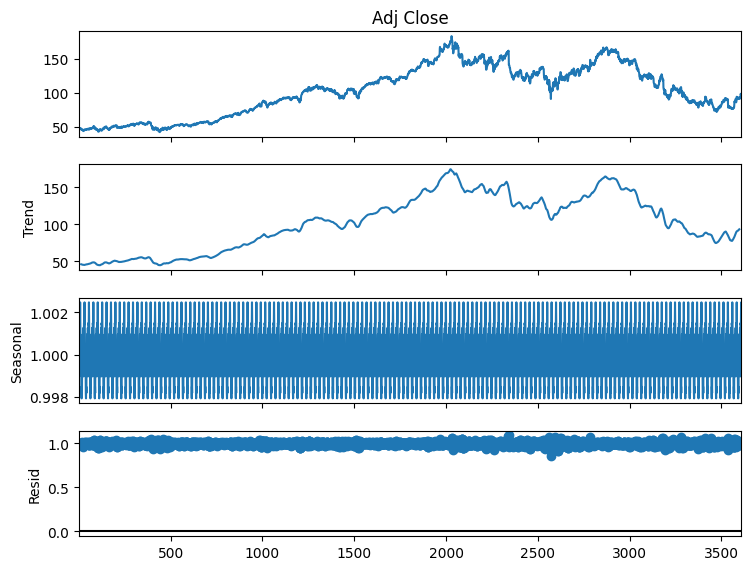

In [283]:
result = seasonal_decompose(df["Adj Close"], model='multiplicative', period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 6)
fig.show()

In [284]:
df["seasonal_diff"]= df["Adj Close"].diff(periods=12)

In [285]:
seasonalDf = df[["Date", "seasonal_diff", "Year", "Month"]]

In [286]:
seasonalDf.dropna()

,Date,seasonal_diff,Year,Month
13,2010-01-22,-0.570351,2010,1
14,2010-01-25,-1.028885,2010,1
15,2010-01-26,-1.174248,2010,1
16,2010-01-27,-1.129520,2010,1
17,2010-01-28,-1.806110,2010,1
...,...,...,...,...
3605,2024-05-01,7.139999,2024,5
3606,2024-05-02,5.759995,2024,5
3607,2024-05-03,6.190002,2024,5
3608,2024-05-06,5.109993,2024,5


In [287]:
seasonGrouped = seasonalDf.groupby(['Year', 'Month']).mean()
seasonGrouped

Date  seasonal_diff
Year Month                                             
2010 1     2010-01-17 02:40:00.000000000      -1.283290
     2     2010-02-13 10:06:18.947368448      -0.734349
     3     2010-03-15 15:39:07.826086912       0.667351
     4     2010-04-16 17:08:34.285714176       1.382086
     5     2010-05-15 12:00:00.000000000      -1.474228
...                                  ...            ...
2024 1     2024-01-16 09:08:34.285714176      -3.106386
     2     2024-02-15 04:48:00.000000000      -4.137959
     3     2024-03-15 02:24:00.000000000       6.624163
     4     2024-04-14 22:54:32.727272704       2.291942
     5     2024-05-03 19:12:00.000000000       5.493999

[173 rows x 2 columns]

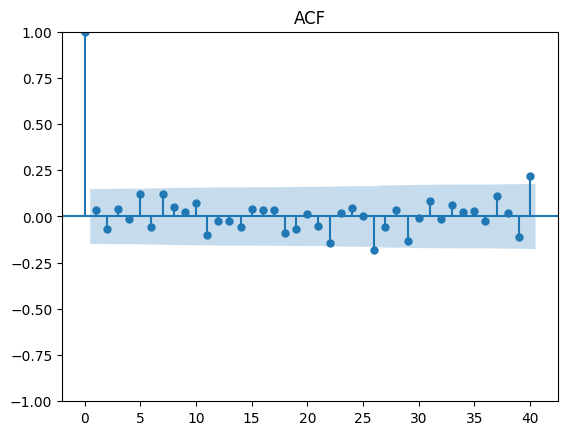

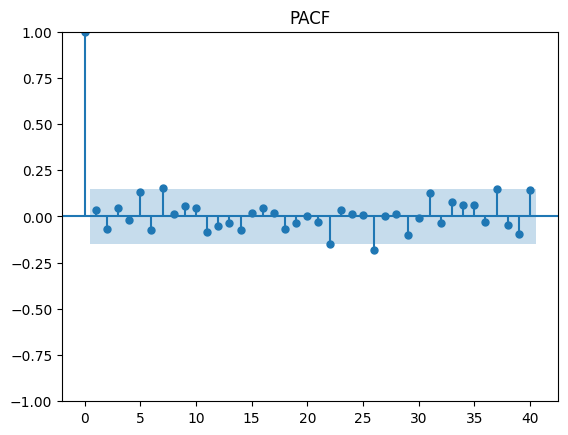

In [288]:
plot_acf(seasonGrouped['seasonal_diff'].dropna(), lags=40, title='ACF')
plot_pacf(seasonGrouped['seasonal_diff'].dropna(), lags=40, title='PACF')
plt.show()

In [289]:
order = (22, 1, 22)  # non-seasonal parameters
seasonal_order = (0, 1, 0, 12)  # seasonal parameters

In [290]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler object
scaler = MinMaxScaler()

# Normalize train and test data


train_sizeSar = int(len(seasonGrouped) * 0.8)  # 80% train, 20% test
trainSar, testSar = seasonGrouped["seasonal_diff"][:train_sizeSar], seasonGrouped["seasonal_diff"][train_sizeSar:]

train_normalized = scaler.fit_transform(trainSar.values.reshape(-1, 1))
test_normalized = scaler.transform(testSar.values.reshape(-1, 1))

In [291]:
modelSar = SARIMAX(train_normalized, order=order, seasonal_order=seasonal_order)
result = modelSar.fit()

In [292]:
forecast = result.forecast(steps=len(test_normalized))

In [293]:
from math import sqrt
rmse = sqrt(mean_squared_error(test_normalized, forecast))
print('Test RMSE:', rmse)

Test RMSE: 0.26578985258350324


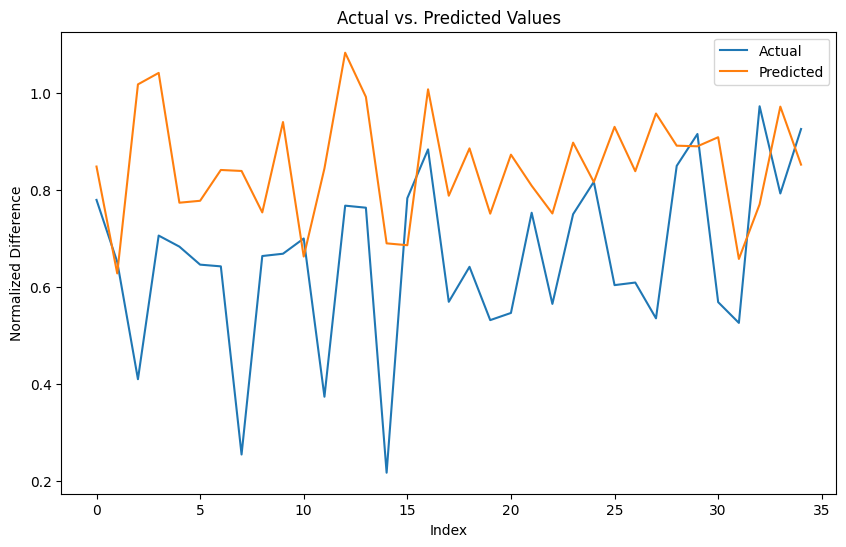

In [295]:

# Adjust the index for plotting
index_rangeSar = range(len(test_normalized))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(index_rangeSar, test_normalized, label='Actual')
plt.plot(index_rangeSar, forecast, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Normalized Difference')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


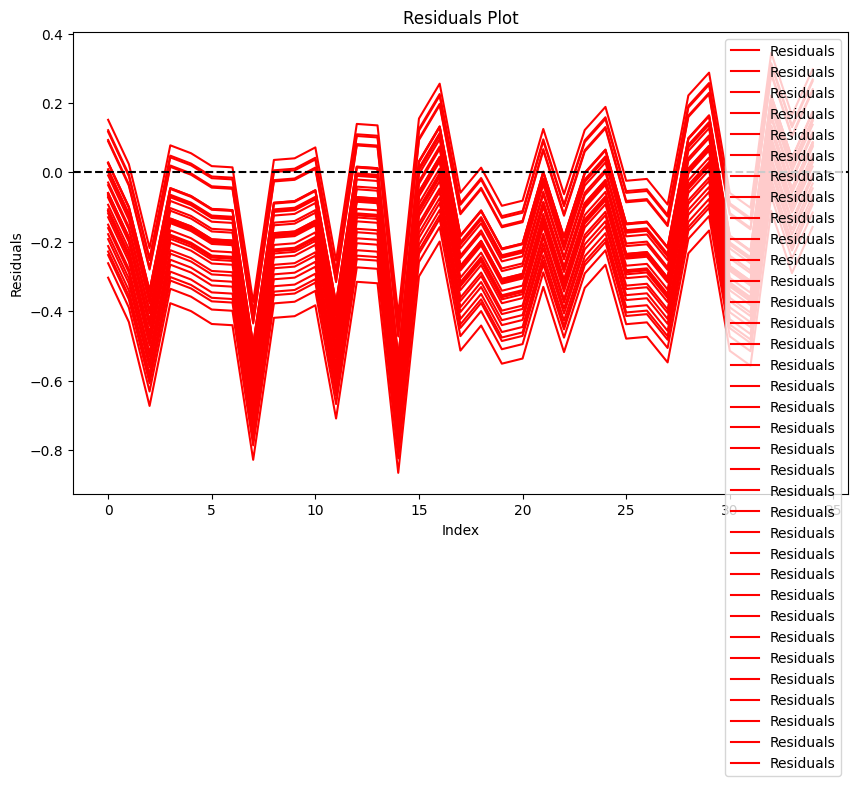

In [296]:
residualsSar = test_normalized - forecast

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(index_rangeSar, residualsSar, label='Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()


In [297]:
next_month_forecast = result.predict(start=len(trainSar), end=len(trainSar))
print("Forecast for the next month:", next_month_forecast)


Forecast for the next month: [0.84808008]


In [298]:
seasonGrouped['Date'] = pd.to_datetime(seasonGrouped['Date'])

# Set the 'Date' column as the index
seasonGrouped.set_index('Date', inplace=True)

data_2024 = seasonGrouped[seasonGrouped.index.year == 2024]

# Get the index for the next month
next_month_index = data_2024.index[-1] + pd.DateOffset(months=1)

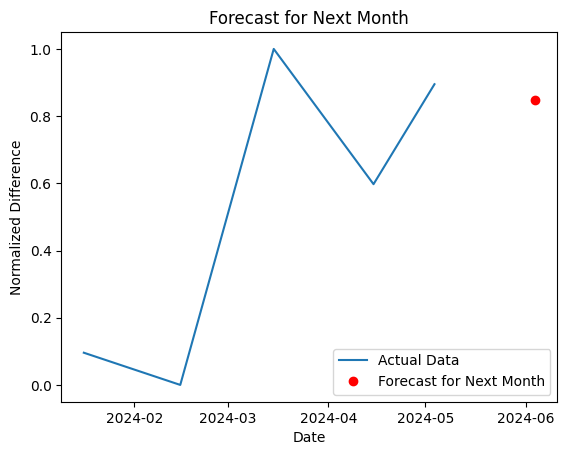

In [299]:
closeNorm_array = data_2024["seasonal_diff"].values

# Reshape the data
closeNorm_reshaped = closeNorm_array.reshape(-1, 1)

# Fit and transform the data
scaler = MinMaxScaler()
closeNorm_scaled = scaler.fit_transform(closeNorm_reshaped)

# Plot the actual data
plt.plot(data_2024.index, closeNorm_scaled, label='Actual Data')

# Plot the forecast for the next month
plt.plot(next_month_index, next_month_forecast, 'ro', label='Forecast for Next Month')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Normalized Difference')
plt.title('Forecast for Next Month')
plt.legend()

# Show plot
plt.show()

In [344]:
next_month_index

Timestamp('2024-06-03 19:12:00')

## ETS

In [47]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the parameter grid
seasonal_periods = [12]  # Assuming monthly seasonality
trend_types = ['add', 'mul']
seasonal_types = ['add', 'mul']

best_model = None
best_aic = np.inf

# Iterate over parameter combinations
for trend in trend_types:
    for seasonal in seasonal_types:
        for period in seasonal_periods:
            # Fit Exponential Smoothing model
            model = ExponentialSmoothing(trainETS, seasonal_periods=period, trend=trend, seasonal=seasonal).fit()
            
            # Calculate AIC
            aic = model.aic
            
            # Update best model if current AIC is lower
            if aic < best_aic:
                best_model = model
                best_aic = aic

# Forecast using the best model
forecast = best_model.forecast(steps=len(testETS))

# Calculate accuracy metrics
mae = mean_absolute_error(testETS, forecast)
mse = mean_squared_error(testETS, forecast)
rmse = np.sqrt(mse)

print("Best Model:")
print("Trend:", best_model.model.trend)
print("Seasonal Type:", best_model.model.seasonal)
print("Seasonal Periods:", best_model.model.seasonal_periods)
print("AIC:", best_aic)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

Best Model:
Trend: mul
Seasonal Type: mul
Seasonal Periods: 12
AIC: -1288.9206046089455
Mean Absolute Error (MAE): 0.011006412927559392
Mean Squared Error (MSE): 0.0001732790589071695
Root Mean Squared Error (RMSE): 0.013163550391409208


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [300]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


train_sizeETS = int(len(yearly_monthly_avg) * 0.8)  # 80% train, 20% test
trainETS, testETS = yearly_monthly_avg["Adj Close Normalized_Diff"][:train_sizeETS], yearly_monthly_avg["Adj Close Normalized_Diff"][train_sizeETS:]

# Fit Exponential Smoothing model
modelETS = ExponentialSmoothing(trainETS, seasonal_periods=12, trend='mul', seasonal='mul').fit()

# Forecast
forecastETS = modelETS.forecast(steps=len(testETS))

# Calculate accuracy metrics
mae = mean_absolute_error(testETS, forecastETS)
mse = mean_squared_error(testETS, forecastETS)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 0.011006412927559392
Mean Squared Error (MSE): 0.0001732790589071695
Root Mean Squared Error (RMSE): 0.013163550391409208


 cross validation ETS

In [301]:
#
#  ETS MODEL CROSS VALIDATION

# import numpy as np
# import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have loaded your data into a DataFrame named 'yearly_monthly_avg'

# Define the number of splits for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store the evaluation metrics for each fold
mae_scores = []
mse_scores = []
rmse_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(yearly_monthly_avg['Adj Close Normalized_Diff']):
    trainETS, testETS = yearly_monthly_avg["Adj Close Normalized_Diff"].iloc[train_index], yearly_monthly_avg["Adj Close Normalized_Diff"].iloc[test_index]

    # Fit Exponential Smoothing model
    modelETS = ExponentialSmoothing(trainETS, seasonal_periods=12, trend='mul', seasonal='mul').fit()

    # Forecast
    forecastETS = modelETS.forecast(steps=len(testETS))

    # Calculate accuracy metrics
    mae = mean_absolute_error(testETS, forecastETS)
    mse = mean_squared_error(testETS, forecastETS)
    rmse = np.sqrt(mse)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Calculate the mean scores across all folds
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

# Print the mean scores
print("Mean Absolute Error (MAE) across all folds:", mean_mae)
print("Mean Squared Error (MSE) across all folds:", mean_mse)
print("Root Mean Squared Error (RMSE) across all folds:", mean_rmse)



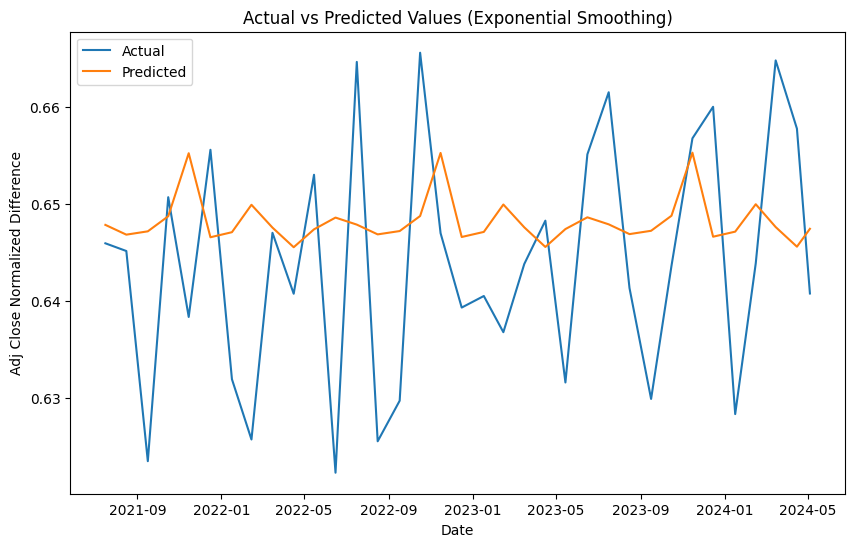

In [302]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_monthly_avg.index[train_sizeETS:], testETS, label='Actual')
plt.plot(yearly_monthly_avg.index[train_sizeETS:], forecastETS, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Normalized Difference')
plt.title('Actual vs Predicted Values (Exponential Smoothing)')
plt.legend()
plt.show()

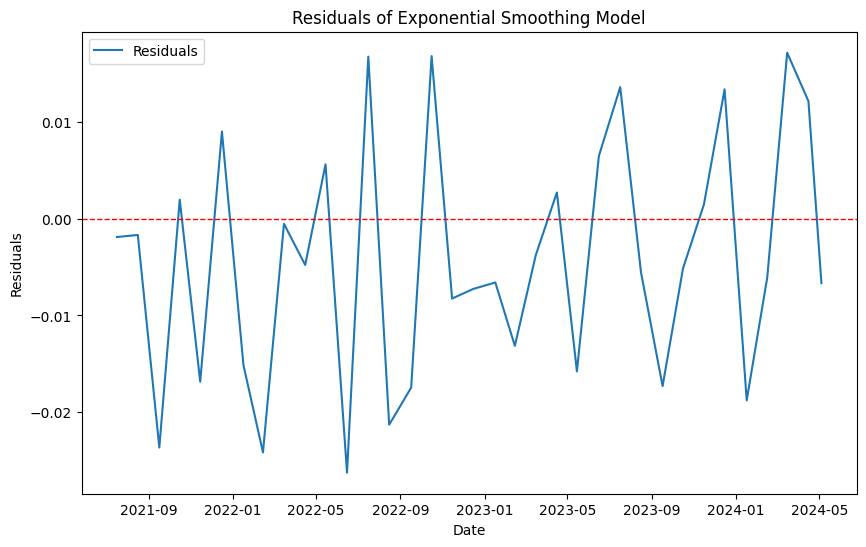

In [303]:
# Calculate residuals
residualsETS = testETS.values - forecastETS.values

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(testETS.index, residualsETS, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add horizontal line at y=0 for reference
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of Exponential Smoothing Model')
plt.legend()
plt.show()


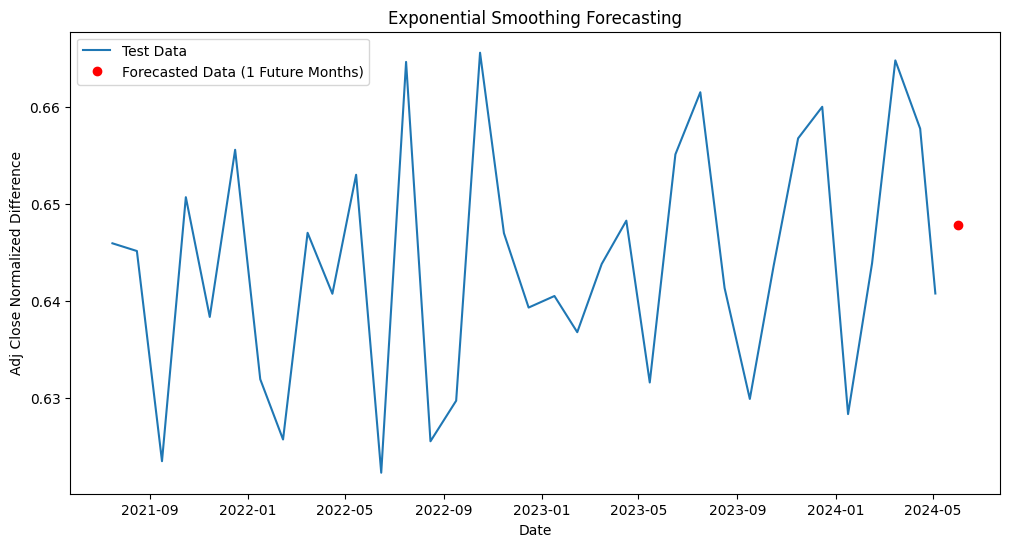

In [304]:
num_periods = 1  # Forecast for the next 1 month

# Generate future dates starting from the last date in your data
last_date = yearly_monthly_avg.index[-1]  # Assuming your index is datetime
future_date = pd.date_range(start=last_date, periods=num_periods, freq='M')[0]

# Forecast for the future dates
future_forecast = modelETS.forecast(steps=num_periods)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_monthly_avg.index[train_sizeETS:], testETS, label='Test Data')
plt.plot(future_date, future_forecast.values[0], 'ro', label=f'Forecasted Data ({num_periods} Future Months)')  # Plotting the forecast as a red dot
plt.xlabel('Date')
plt.ylabel('Adj Close Normalized Difference')
plt.title('Exponential Smoothing Forecasting')
plt.legend()
plt.show()


## SVR

In [305]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Assuming yearly_monthly_avg is your DataFrame containing the data

# 1. Define features and target variable
featuresSVR = yearly_monthly_avg.drop(columns=['Adj Close', 'Adj Close Normalized_Diff', "Adj Close Log", "Adj Close Normalized_Log", "Volume", "Adj Close Diff"])
targetSVR = yearly_monthly_avg['Adj Close Normalized_Diff']

# 2. Train-Test Split
X_trainSVR, X_testSVR, y_trainSVR, y_testSVR = train_test_split(featuresSVR, targetSVR, test_size=0.2, shuffle=False)

# 3. Scale the features
scaler = MinMaxScaler()
X_train_scaledSVR = scaler.fit_transform(X_trainSVR)
X_test_scaledSVR = scaler.transform(X_testSVR)

# 4. Define the SVR model with best parameters
best_params = {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
best_modelSVR = SVR(**best_params)

# 5. Fit the model to the training data
best_modelSVR.fit(X_train_scaledSVR, y_trainSVR)

# 6. Make predictions on the test set
y_predSVR = best_modelSVR.predict(X_test_scaledSVR)

# 7. Calculate RMSE
rmse = mean_squared_error(y_testSVR, y_predSVR, squared=False)
print("RMSE:", rmse)


RMSE: 0.0123964374403371


Cross Validation of SVR

In [ ]:

#  SVR MODEL CROSS VALIDATION

# import pandas as pd
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import MinMaxScaler

# Assuming yearly_monthly_avg is your DataFrame containing the data

# Define the number of splits for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store the RMSE for each fold
rmse_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(yearly_monthly_avg):
    # 1. Define features and target variable
    featuresSVR = yearly_monthly_avg.drop(columns=['Adj Close', 'Adj Close Normalized_Diff', "Adj Close Log", "Adj Close Normalized_Log", "Volume", "Adj Close Diff"])
    targetSVR = yearly_monthly_avg['Adj Close Normalized_Diff']

    # Split data into train and test sets
    X_trainSVR, X_testSVR = featuresSVR.iloc[train_index], featuresSVR.iloc[test_index]
    y_trainSVR, y_testSVR = targetSVR.iloc[train_index], targetSVR.iloc[test_index]

    # 2. Scale the features
    scaler = MinMaxScaler()
    X_train_scaledSVR = scaler.fit_transform(X_trainSVR)
    X_test_scaledSVR = scaler.transform(X_testSVR)

    # 3. Define the SVR model with best parameters
    best_params = {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
    best_modelSVR = SVR(**best_params)

    # 4. Fit the model to the training data
    best_modelSVR.fit(X_train_scaledSVR, y_trainSVR)

    # 5. Make predictions on the test set
    y_predSVR = best_modelSVR.predict(X_test_scaledSVR)

    # 6. Calculate RMSE
    rmse = mean_squared_error(y_testSVR, y_predSVR, squared=False)
    rmse_scores.append(rmse)

# Calculate the mean RMSE across all folds
mean_rmse = sum(rmse_scores) / n_splits

# Print the mean RMSE
print("Mean Root Mean Squared Error (RMSE) across all folds:", mean_rmse)


In [61]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


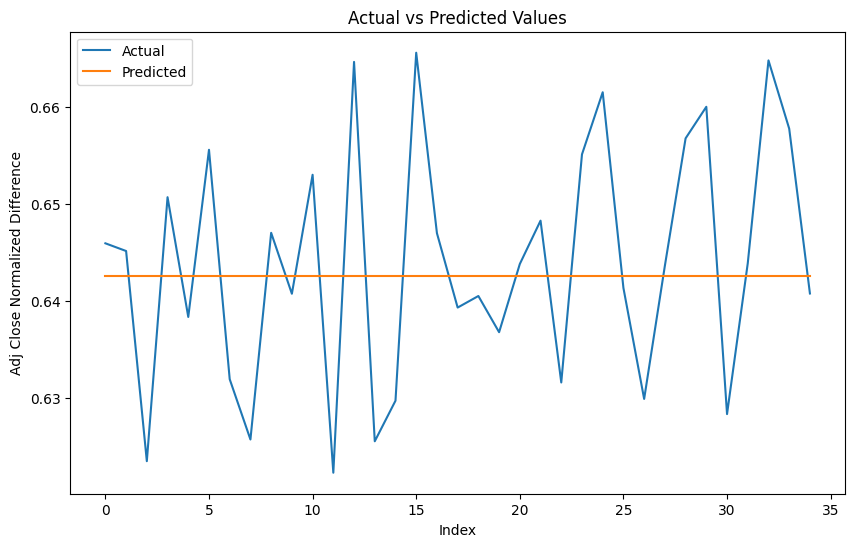

In [306]:
plt.figure(figsize=(10, 6))
plt.plot(y_testSVR.values, label='Actual')
plt.plot(y_predSVR, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Adj Close Normalized Difference')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

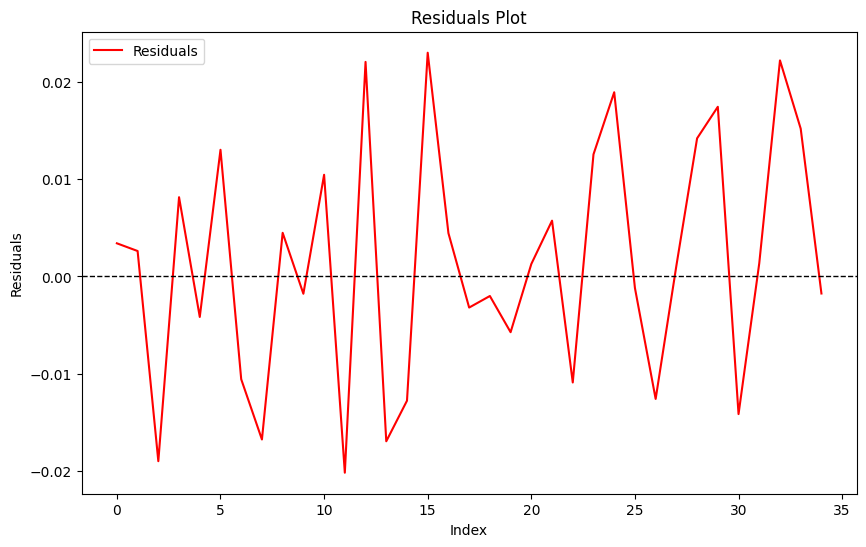

In [307]:
residuals = y_testSVR.values - y_predSVR

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at y=0 for reference
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()


In [308]:
# Get the last date in your data
last_dateSVR = yearly_monthly_avg.index[-1]

# Generate the next month's date
next_month_dateSVR = last_dateSVR + pd.DateOffset(months=1)

# Prepare features for the next month
# For example, you can take the last available data point and use it to predict the next month
X_next_monthSVR = yearly_monthly_avg.iloc[[-1]].drop(columns=['Adj Close', 'Adj Close Normalized_Diff', "Adj Close Log", "Adj Close Normalized_Log", "Volume", "Adj Close Diff"])

# Scale the features
X_next_month_scaled = scaler.transform(X_next_month)  # Assuming 'scaler' is the MinMaxScaler used earlier

# Make predictions for the next month
forecast_next_monthSVR = best_modelSVR.predict(X_next_month_scaled)


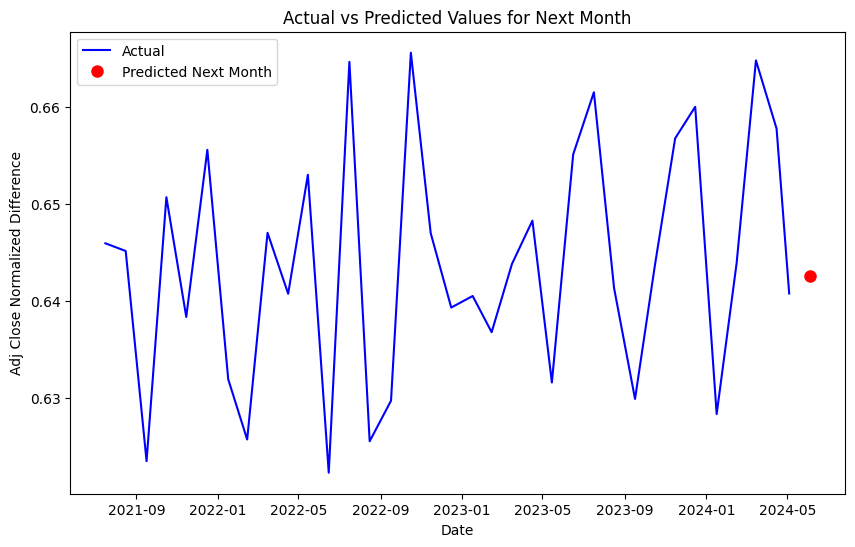

In [309]:
plt.figure(figsize=(10, 6))
plt.plot(y_testSVR.index, y_testSVR.values, label='Actual', color='blue')
plt.plot(next_month_dateSVR, forecast_next_monthSVR, 'ro', label='Predicted Next Month', markersize=8)
plt.xlabel('Date')
plt.ylabel('Adj Close Normalized Difference')
plt.title('Actual vs Predicted Values for Next Month')
plt.legend()
plt.show()

## Prophet

18:27:16 - cmdstanpy - INFO - Chain [1] start processing
18:27:16 - cmdstanpy - INFO - Chain [1] done processing


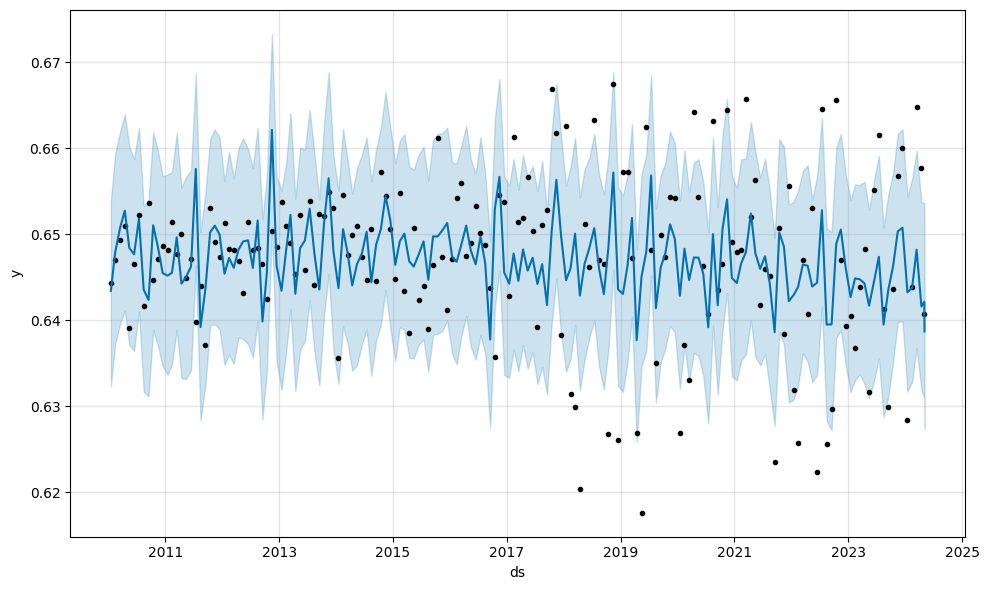

In [310]:
from prophet import Prophet
import pandas as pd

# Assuming yearly_monthly_avg is your DataFrame containing the data
# Assuming 'Adj Close Normalized_Diff' is the target variable

# Reset the index to make 'Date' a column
yearly_monthly_avg.reset_index(inplace=True)

# Selecting only the 'Date' and 'Adj Close Normalized_Diff' columns
data_prophet = yearly_monthly_avg[['Date', 'Adj Close Normalized_Diff']]
data_prophet.columns = ['ds', 'y']  # Renaming columns as required by Prophet

# Define the model
model_prophet = Prophet(seasonality_mode='multiplicative', 
                        yearly_seasonality=True, 
                        weekly_seasonality=True, 
                        daily_seasonality=False, 
                        holidays=None)  # Add holidays if needed

# Fit the model
model_prophet.fit(data_prophet)

# Forecast
future = model_prophet.make_future_dataframe(periods=1)  # Forecast for the next 30 days
forecast = model_prophet.predict(future)

# Evaluate (if needed)
# Add evaluation code here if you have test data

# Visualize the forecast
fig = model_prophet.plot(forecast)


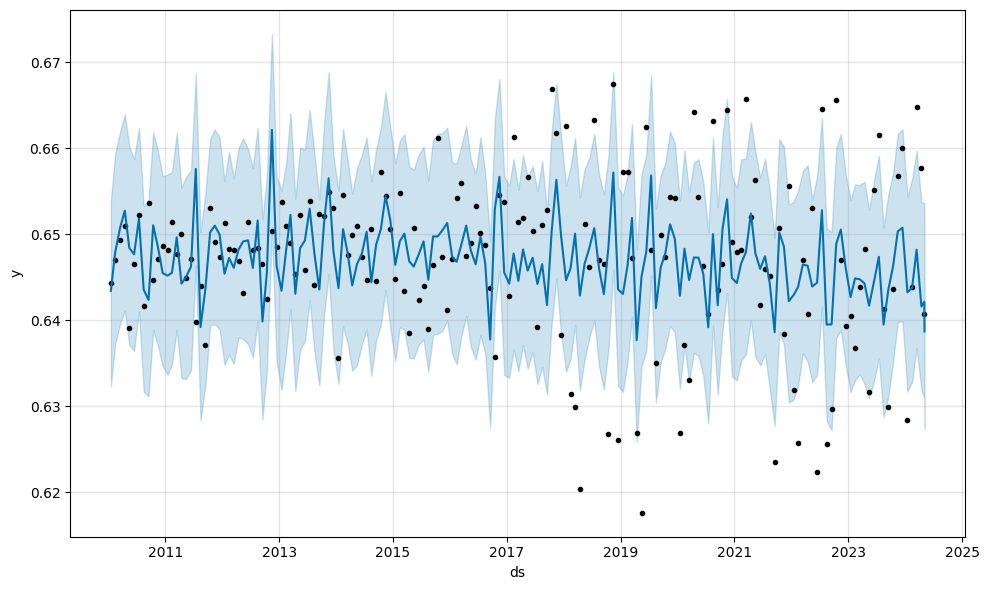

In [311]:
fig = model_prophet.plot(forecast)

Cross Validation of Prophet

In [ ]:

#  PROPHET MODEL CROSS VALIDATION...

from prophet import Prophet
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Assuming yearly_monthly_avg is your DataFrame containing the data
# Assuming 'Adj Close Normalized_Diff' is the target variable

# Reset the index to make 'Date' a column
yearly_monthly_avg.reset_index(inplace=True)

# Selecting only the 'Date' and 'Adj Close Normalized_Diff' columns
data_prophet = yearly_monthly_avg[['Date', 'Adj Close Normalized_Diff']]
data_prophet.columns = ['ds', 'y']  # Renaming columns as required by Prophet

# Define the number of splits for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store the RMSE for each fold
rmse_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(data_prophet):
    # Split data into train and test sets
    train_prophet, test_prophet = data_prophet.iloc[train_index], data_prophet.iloc[test_index]

    # Define the model
    model_prophet = Prophet(seasonality_mode='multiplicative', 
                            yearly_seasonality=True, 
                            weekly_seasonality=True, 
                            daily_seasonality=False, 
                            holidays=None)  # Add holidays if needed

    # Fit the model
    model_prophet.fit(train_prophet)

    # Forecast
    future = model_prophet.make_future_dataframe(periods=1)  # Forecast for the next 1 period
    forecast = model_prophet.predict(future)

    # Evaluate (if needed)
    # Add evaluation code here if you have test data

    # Filter the forecasted values for the validation period
    end_date = test_prophet['ds'].max()
    forecast_valid = forecast[forecast['ds'] <= end_date]

    # Merge the actual values with the forecasted values for the validation period
    merged_valid = pd.merge(test_prophet, forecast_valid, on='ds')

    # Calculate RMSE
    rmse = mean_squared_error(merged_valid['y'], merged_valid['yhat'], squared=False)
    rmse_scores.append(rmse)

# Calculate the mean RMSE across all folds
mean_rmse = sum(rmse_scores) / n_splits

# Print the mean RMSE
print("Mean Root Mean Squared Error (RMSE) across all folds:", mean_rmse)


In [312]:
end_date = data_prophet['ds'].max()

# Filter the forecasted values for the validation period
forecast_valid = forecast[forecast['ds'] <= end_date]

# Merge the actual values with the forecasted values for the validation period
merged_valid = pd.merge(data_prophet, forecast_valid, on='ds')

# Calculate RMSE
rmse = mean_squared_error(merged_valid['y'], merged_valid['yhat'], squared=False)
print("RMSE:", rmse)

RMSE: 0.008765351675356406


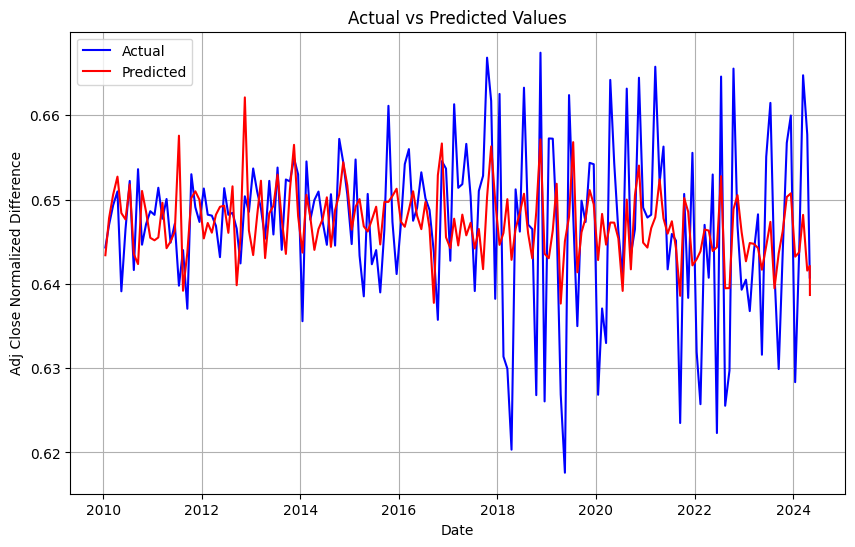

In [313]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(data_prophet['ds'], data_prophet['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Normalized Difference')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


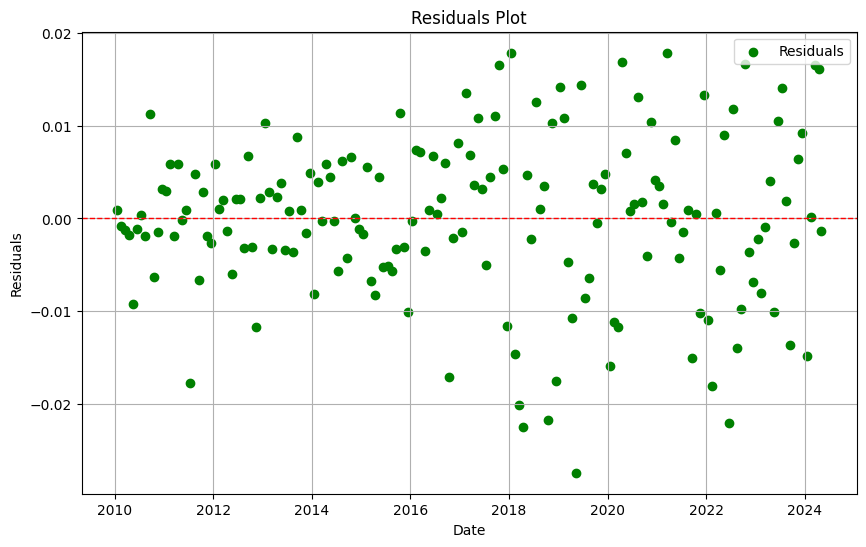

In [314]:
import matplotlib.pyplot as plt

# Calculate residuals
residualsP = data_prophet['y'] - forecast['yhat']

dates = forecast['ds']

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(dates, residualsP, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at y=0 for reference
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()


## LTSM

In [315]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'data' is your DataFrame with the sequence data

# 1. Prepare the Data
# Convert DataFrame to numpy array
data_array = yearly_monthly_avg['Adj Close Normalized_Diff']



# Convert data to sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Define the length of input sequences
XLTSM, yLTSM = create_sequences(data_array, sequence_length)

# 2. Design the Model
modelLTSM = Sequential()
modelLTSM.add(LSTM(units=50, return_sequences=True, input_shape=(XLTSM.shape[1], 1)))
modelLTSM.add(LSTM(units=50))
modelLTSM.add(Dense(units=1))

# 3. Compile the Model
modelLTSM.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
modelLTSM.fit(XLTSM, yLTSM, epochs=100, batch_size=32)

# 5. Evaluate the Model (Optional)
# You can split your data into training and testing sets to evaluate the model's performance


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2800
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0468 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0332 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1382e-04 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1867e-04 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4044e-04 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3025e-04 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1197e-04 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7179e-04 
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8467e-05 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

In [316]:
y_predLTSM = modelLTSM.predict(XLTSM)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(yLTSM, y_predLTSM))
print("RMSE:", rmse)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
RMSE: 0.010004392500339387


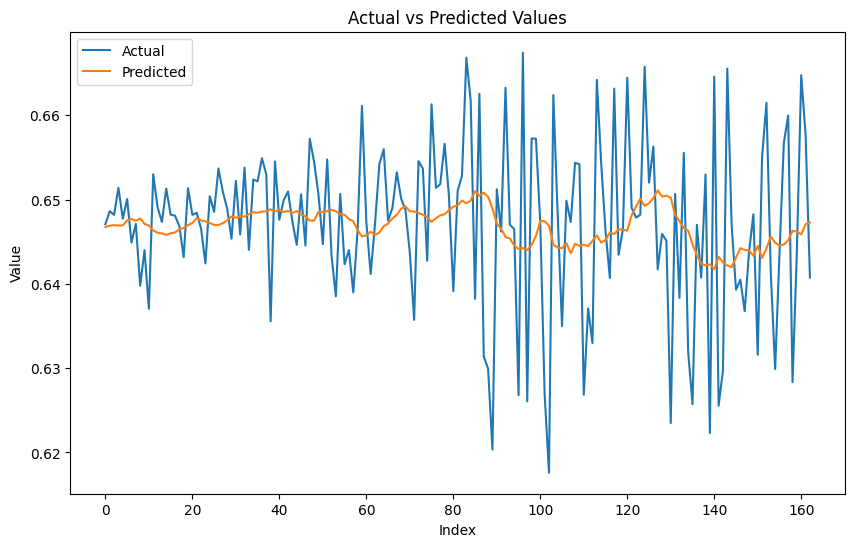

In [317]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(yLTSM, label='Actual')
plt.plot(y_predLTSM, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

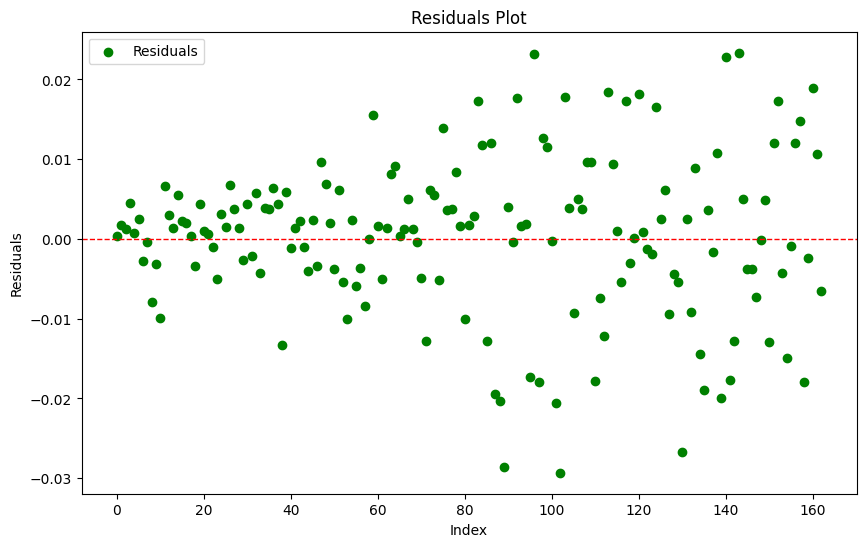

In [318]:
import matplotlib.pyplot as plt

# Calculate residuals
residualsLTSM = yLTSM - y_predLTSM.flatten()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residualsLTSM)), residualsLTSM, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at y=0 for reference
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()


In [319]:
last_dateLTSM = yearly_monthly_avg["Date"].iloc[-1]

# Generate the next month's date
next_month_dateLTSM = last_dateLTSM + pd.DateOffset(months=1)
print("Next month's date:", next_month_dateLTSM)

Next month's date: 2024-06-03 19:12:00


In [320]:
# 1. Prepare the input data
# Take the last `sequence_length` data points from your original data as the input sequence for prediction
last_sequence = data_array[-sequence_length:].values  # Convert Series to numpy array

predicted_values = modelLTSM.predict(np.expand_dims(last_sequence, axis=0))

# Extract the predicted value
predicted_value = predicted_values[0][0]

print("Predicted value for the next month:", predicted_value)

# 4. Inverse transform the predicted value (if necessary)
# If you scaled your data using MinMaxScaler, you may need to inverse transform the predicted value
# Example:


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted value for the next month: 0.64683455


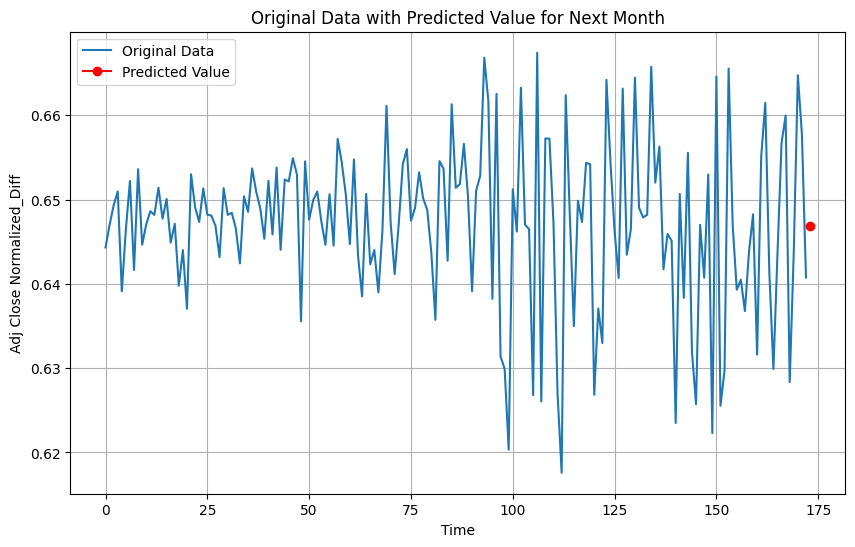

In [321]:
# Append the predicted value to the original data array
extended_data_array = np.append(data_array.values, predicted_value)

# Plot the original data along with the appended predicted value
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(data_array)), data_array, label='Original Data')
plt.plot(np.arange(len(data_array), len(data_array) + 1), predicted_value, marker='o', color='red', label='Predicted Value')
plt.xlabel('Time')
plt.ylabel('Adj Close Normalized_Diff')
plt.title('Original Data with Predicted Value for Next Month')
plt.legend()
plt.grid(True)
plt.show()

## HYBRID ANN

In [322]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

# Assuming you have a DataFrame 'yearly_monthly_avg' with columns 'Adj Close Normalized_Diff', 'High', 'Open', 'Low', and 'Date'

# Splitting data into train and test sets
train_size = int(len(yearly_monthly_avg) * 0.8)
train, test = yearly_monthly_avg[:train_size], yearly_monthly_avg[train_size:]

# Training ARIMA model
arima_model = ARIMA(train['Adj Close Normalized_Diff'], order=(22, 1, 22))
arima_fit = arima_model.fit()

# Generating ARIMA forecasts
arima_forecast = arima_fit.forecast(steps=len(test))

# Extracting forecasted values
arima_forecast_values = arima_forecast.values

# Calculating residuals
residuals = test['Adj Close Normalized_Diff'].values - arima_forecast_values

# Preparing data for ANN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[['High', 'Open', 'Low']].values)
y_train = train['Adj Close Normalized_Diff'].values - arima_fit.fittedvalues

X_test = scaler.transform(test[['High', 'Open', 'Low']].values)
y_test = residuals

# Building ANN model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Training ANN model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Making predictions with the ANN
residuals_pred = model.predict(X_test).flatten()

# Calculating accuracy metrics
mse = mean_squared_error(y_test, residuals_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model:", rmse)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model: 0.01995410905607898


Cross Validation of Hybrid ARIMA ANN

In [ ]:

#  CROSS VALIDATION HYBRID-ANN


# import numpy as np
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.model_selection import TimeSeriesSplit

# Assuming you have a DataFrame 'yearly_monthly_avg' with columns 'Adj Close Normalized_Diff', 'High', 'Open', 'Low', and 'Date'

# Splitting data into train and test sets
train_size = int(len(yearly_monthly_avg) * 0.8)
train, test = yearly_monthly_avg[:train_size], yearly_monthly_avg[train_size:]

# Training ARIMA model
arima_model = ARIMA(train['Adj Close Normalized_Diff'], order=(22, 1, 22))
arima_fit = arima_model.fit()

# Generating ARIMA forecasts
arima_forecast = arima_fit.forecast(steps=len(test))

# Extracting forecasted values
arima_forecast_values = arima_forecast.values

# Calculating residuals
residuals = test['Adj Close Normalized_Diff'].values - arima_forecast_values

# Preparing data for ANN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[['High', 'Open', 'Low']].values)
y_train = train['Adj Close Normalized_Diff'].values - arima_fit.fittedvalues

X_test = scaler.transform(test[['High', 'Open', 'Low']].values)
y_test = residuals

# Define the number of splits for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store the RMSE for each fold
rmse_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_train):
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    # Building ANN model
    model = Sequential()
    model.add(Dense(8, input_dim=X_train_cv.shape[1], activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Training ANN model
    model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=10, verbose=0)

    # Making predictions with the ANN
    residuals_pred_cv = model.predict(X_test_cv).flatten()

    # Calculating accuracy metrics
    mse = mean_squared_error(y_test_cv, residuals_pred_cv)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

# Calculate the mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)

print("Mean Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model across all folds:", mean_rmse)




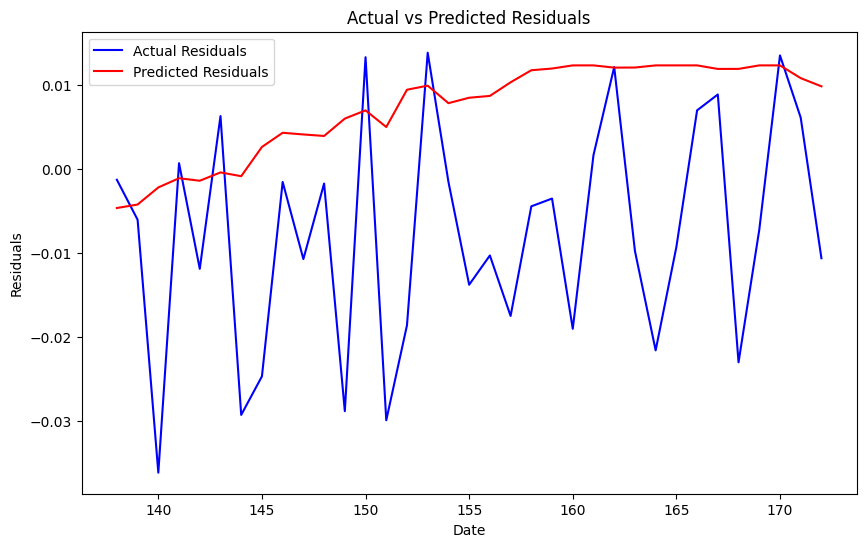

In [323]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test, label='Actual Residuals', color='blue')
plt.plot(test.index, residuals_pred, label='Predicted Residuals', color='red')
plt.title('Actual vs Predicted Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

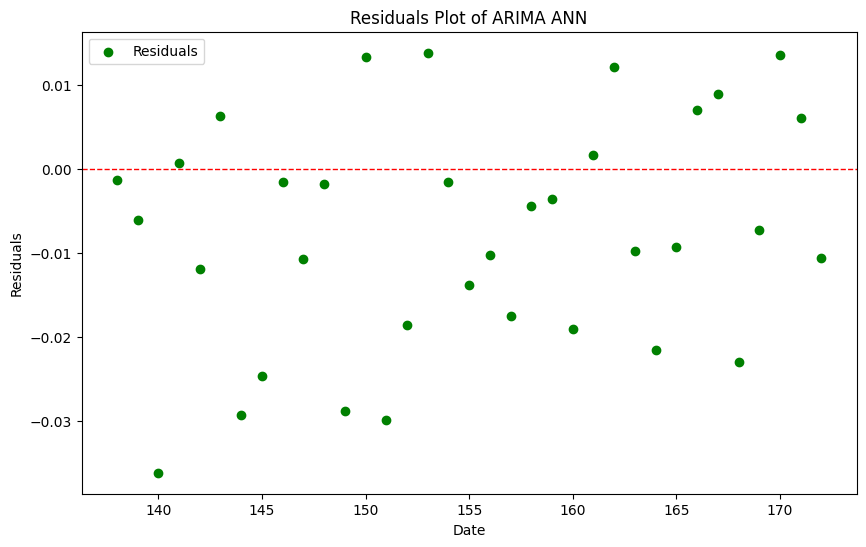

In [324]:

plt.figure(figsize=(10, 6))
plt.scatter(test.index, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at y=0 for reference
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot of ARIMA ANN')
plt.legend()
plt.show()


In [326]:
# Forecasting the exogenous variables for the next month (similar to Prophet)
# You can use any method to forecast these variables
# For demonstration, let's assume we just repeat the last observed values
last_observed_values = yearly_monthly_avg[['High', 'Open', 'Low']].iloc[-1].values
exogenous_forecast = np.repeat(last_observed_values.reshape(1, -1), forecast_steps, axis=0)

# Preparing data for ANN prediction
exogenous_scaled = scaler.transform(exogenous_forecast)

# Making predictions with the ANN
residuals_pred_next_month = model.predict(exogenous_scaled).flatten()

# Forecasting using the ARIMA model for the next month
arima_forecast_next_month = arima_fit.forecast(steps=forecast_steps)

# Combine ARIMA and ANN forecasts to get the final forecast
final_forecast = arima_forecast_next_month + residuals_pred_next_month

# Print or use final_forecast as needed
print("Final forecast for the next month:", final_forecast)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Final forecast for the next month: 138    0.657049
139    0.661009
140    0.669491
141    0.659821
142    0.660068
143    0.659092
144    0.671047
145    0.660252
146    0.658386
147    0.661292
148    0.664549
149    0.660978
150    0.661134
151    0.665297
152    0.658155
153    0.661543
154    0.658338
155    0.662928
156    0.660633
157    0.664109
158    0.658080
159    0.661615
160    0.660460
161    0.663268
162    0.659173
163    0.660919
164    0.661334
165    0.662738
166    0.659588
167    0.660949
168    0.661196
169    0.660955
170    0.661074
171    0.661449
172    0.661221
Name: predicted_mean, dtype: float64


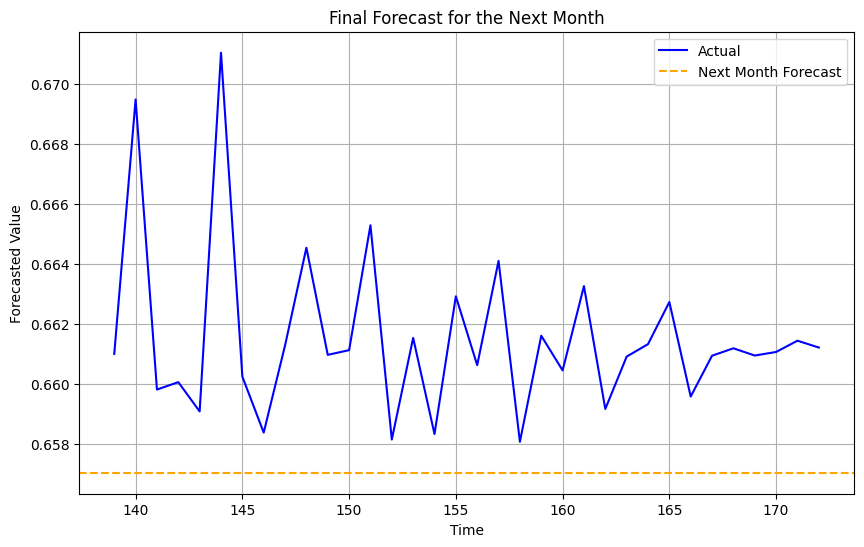

In [343]:
import matplotlib.pyplot as plt

# Plotting the final forecast
plt.figure(figsize=(10, 6))
plt.plot(final_forecast.index[1:], final_forecast.iloc[1:], label='Actual', color='blue')
plt.axhline(final_forecast.iloc[0], label='Next Month Forecast', color='orange', linestyle='--')
plt.title('Final Forecast for the Next Month')
plt.xlabel('Time')
plt.ylabel('Forecasted Value')
plt.legend()
plt.grid(True)
plt.show()


In [345]:
import pandas as pd

# Provided RMSE and forecast values for each model
rmse_dict = {'ARIMA': 0.0158, 'ANN': 0.0139, 'SARIMA': 0.265789, 'ETS': 0.0110064, 'SVR': 0.01239, 'Prophet': 0.00876, 'LTSM': 0.0100, 'HYBRID ARIMA': 0.0179}
forecast_dict = {'ARIMA': 0.647204, 'ANN': 0.6527102, 'SARIMA': 0.84808008, 'ETS': 0.64782, 'SVR': 0.64251196, 'Prophet': 0.638684, 'LTSM': 0.6474151, 'HYBRID ARIMA': 0.657049}

# Date
date = '2024-06-03'

# Create DataFrame
dfFinal = pd.DataFrame(columns=['Date', 'Model', 'RMSE', 'Forecast'])
for model in rmse_dict:
    dfFinal.loc[len(dfFinal)] = [date, model, rmse_dict[model], forecast_dict[model]]

dfFinal


,Date,Model,RMSE,Forecast
0,2024-06-03,ARIMA,0.015800,0.647204
1,2024-06-03,ANN,0.013900,0.652710
2,2024-06-03,SARIMA,0.265789,0.848080
3,2024-06-03,ETS,0.011006,0.647820
4,2024-06-03,SVR,0.012390,0.642512
5,2024-06-03,Prophet,0.008760,0.638684
6,2024-06-03,LTSM,0.010000,0.647415
7,2024-06-03,HYBRID ARIMA,0.017900,0.657049


In [346]:
dfFinal.to_csv("RMSE_ForeModels.csv")

In [350]:
import sqlite3


In [352]:
df1 = pd.read_csv(r"C:\Users\hp\ActualVals.csv")
df2 = pd.read_csv(r"C:\Users\hp\PredictedVals.csv")
df3 = pd.read_csv(r"C:\Users\hp\RMSE_ForeModels.csv")

In [359]:
def merge_dataframes_and_create_table(df1, df2):
    # Merge the DataFrames based on a common key, e.g., Date
    merged_df = pd.merge(df1, df2, on='Date')

    # Connect to the SQLite database
    conn = sqlite3.connect('model_data.db')
    cur = conn.cursor()

    # Create table
    cur.execute('''CREATE TABLE IF NOT EXISTS All_Actual_Predictions_Residuals (
                    Date TEXT,
                    ActualAll REAL,
                    ActualSar REAL,
                    PredArima REAL,
                    ResArima REAL,
                    PredANN REAL,
                    ResANN REAL,
                    PredSar REAL,
                    ResSar REAL,
                    PredETS REAL,
                    ResETS REAL,
                    PredSVR REAL,
                    ResSVR REAL,
                    PredProphet REAL,
                    ResProphet REAL,
                    PredLTSM REAL,
                    ResLTSM REAL,
                    ActResHy REAL,
                    PredResHy REAL,
                    HyRes REAL
                    )''')

    # Insert data
    for index, row in merged_df.iterrows():
        cur.execute('''INSERT INTO All_Actual_Predictions_Residuals 
                    (Date, ActualAll, ActualSar, PredArima, ResArima, PredANN, ResANN, PredSar, ResSar,
                     PredETS, ResETS, PredSVR, ResSVR, PredProphet, ResProphet, PredLTSM, ResLTSM, 
                     ActResHy, PredResHy, HyRes)
                    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''',
                    (row['Date'], row['ActualAll'], row['ActualSar'], row['PredArima'], row['ResArima'],
                     row['PredANN'], row['ResANN'], row['PredSar'], row['ResSar'], row['PredETS'],
                     row['ResETS'], row['PredSVR'], row['ResSVR'], row['PredProphet'], row['ResProphet'],
                     row['PredLTSM'], row['ResLTSM'], row['ActResHy'], row['PredResHy'], row['HyRes']))

    # Commit changes
    conn.commit()
    conn.close()

# Assuming df1 and df2 are your DataFrames
merge_dataframes_and_create_table(df1, df2)

In [361]:
def fetch_data_with_column_names():
    conn = sqlite3.connect('model_data.db')
    cur = conn.cursor()

    # Fetch column names
    cur.execute("PRAGMA table_info(All_Actual_Predictions_Residuals)")
    columns = cur.fetchall()
    column_names = [col[1] for col in columns]

    # Fetch all rows from the table
    cur.execute("SELECT * FROM All_Actual_Predictions_Residuals")
    rows = cur.fetchall()

    # Print column names
    print(column_names)

    # Print the rows with column names
    for row in rows:
        print(row)

    # Close the connection
    conn.close()

# Call the function to fetch data with column names
fetch_data_with_column_names()

['Date', 'ActualAll', 'ActualSar', 'PredArima', 'ResArima', 'PredANN', 'ResANN', 'PredSar', 'ResSar', 'PredETS', 'ResETS', 'PredSVR', 'ResSVR', 'PredProphet', 'ResProphet', 'PredLTSM', 'ResLTSM', 'ActResHy', 'PredResHy', 'HyRes']
('2021-07-16 13:42:51.428571392', 0.645923326473123, 0.7792834814263034, 0.6472041841464807, -0.0012808576733577, 0.6473389, -0.0014156003190217, 0.8480800772446163, -0.0681317393342595, 0.6478196280402992, -0.0018963015671762, 0.6425119600864421, 0.0034113663866809, 0.6442416706429046, 0.0008886296574777, 0.65120876, -0.005285431881064, -0.0012808576733577, -0.0025681034, -0.0012808576733577)
('2021-08-15 22:54:32.727272704', 0.6451303003003823, 0.6515225124742305, 0.6511644574127357, -0.0060341571123533, 0.6486673, -0.0035369756052268, 0.6276963536418702, -0.1958927082863324, 0.6468145909773843, -0.0016842906770019, 0.6425119600864421, 0.0026183402139402, 0.6385873847149552, -0.0150950783094722, 0.6514687, -0.0063383939096701, -0.0060341571123533, -0.0023300

In [362]:
df3.columns

Index(['Unnamed: 0', 'Date', 'Model', 'RMSE', 'Forecast'], dtype='object')

In [363]:
def create_table_and_insert_data(df):
    # Connect to the SQLite database
    conn = sqlite3.connect('model_data.db')
    cur = conn.cursor()

    # Create table
    cur.execute('''CREATE TABLE IF NOT EXISTS RMSE_Forecast (
                    Date TEXT,
                    Model TEXT,
                    RMSE REAL,
                    Forecast REAL
                    )''')

    # Insert data
    for index, row in df.iterrows():
        cur.execute('''INSERT INTO RMSE_Forecast 
                    (Date, Model, RMSE, Forecast)
                    VALUES (?, ?, ?, ?)''',
                    (row['Date'], row['Model'], row['RMSE'], row['Forecast']))

    # Commit changes
    conn.commit()
    conn.close()

# Assuming df is your DataFrame with columns 'Date', 'Model', 'RMSE', 'Forecast'
create_table_and_insert_data(df3)

In [364]:
def fetch_data_from_table():
    conn = sqlite3.connect('model_data.db')
    cur = conn.cursor()

    # Fetch all rows from the table
    cur.execute("SELECT * FROM RMSE_Forecast")
    rows = cur.fetchall()

    # Print the rows
    for row in rows:
        print(row)

    # Close the connection
    conn.close()

# Call the function to fetch data from the table
fetch_data_from_table()

('2024-06-03', 'ARIMA', 0.0158, 0.647204)
('2024-06-03', 'ANN', 0.0139, 0.6527102)
('2024-06-03', 'SARIMA', 0.265789, 0.84808008)
('2024-06-03', 'ETS', 0.0110064, 0.64782)
('2024-06-03', 'SVR', 0.01239, 0.64251196)
('2024-06-03', 'Prophet', 0.00876, 0.638684)
('2024-06-03', 'LTSM', 0.01, 0.6474151)
('2024-06-03', 'HYBRID ARIMA', 0.0179, 0.657049)


In [367]:
def access_database():
    # Connect to the SQLite database
    conn = sqlite3.connect(r'C:\Users\hp\model_data.db')
    cur = conn.cursor()

    # Execute SQL queries or perform other database operations
    # For example, you can fetch data from tables, insert data, etc.
    cur.execute("SELECT * FROM RMSE_Forecast")
    rows = cur.fetchall()
    for row in rows:
        print(row)

    # Close the connection
    conn.close()

# Call the function to access the database
access_database()

('2024-06-03', 'ARIMA', 0.0158, 0.647204)
('2024-06-03', 'ANN', 0.0139, 0.6527102)
('2024-06-03', 'SARIMA', 0.265789, 0.84808008)
('2024-06-03', 'ETS', 0.0110064, 0.64782)
('2024-06-03', 'SVR', 0.01239, 0.64251196)
('2024-06-03', 'Prophet', 0.00876, 0.638684)
('2024-06-03', 'LTSM', 0.01, 0.6474151)
('2024-06-03', 'HYBRID ARIMA', 0.0179, 0.657049)


In [370]:
df3["Model"].values

array(['ARIMA', 'ANN', 'SARIMA', 'ETS', 'SVR', 'Prophet', 'LTSM',
       'HYBRID ARIMA'], dtype=object)

In [372]:
data_dict = df3.to_dict(orient='records')

# Specify the file path for the JSON file
json_file_path = 'RMSE_Forecast.json'

# Save the data dictionary to a JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(data_dict, json_file)

print("Data saved as JSON successfully.")

Data saved as JSON successfully.
